# NUMPY

* Used in almost all numerical computations in Python
* Used for high-performance vector and matrix computations
* Provides fast precompiled functions for numerical routines
* Written in C and Fortran


```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

```python
# Python code
result = 0
for i in range(100):
    result += i
```

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

```python
# Python code
x = 4
x = "four"
```

## Why NumPy?
High-performance vector and matrix computations

In [1]:
import time
def trad_version():  
    t1 = time.time()
    X = range(10000000) # 10,000,000 
    Y = range(10000000)  
    Z = []
    for i in range(len(X)):
        Z.append(X[i] + Y[i])  
    print("Top 5 Z's: " + str(Z[:5]))
    return time.time() - t1
print("time: " + str(trad_version()))


Top 5 Z's: [0, 2, 4, 6, 8]
time: 3.153885841369629


In [2]:
import numpy as np
def numpy_version():  
    t1 = time.time()
    X = np.arange(10000000)  
    Y = np.arange(10000000)  
    Z = X + Y
    return time.time() - t1

numpy_version()  


0.03590226173400879

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 



## A Python Integer Is More Than Just an Integer

![Integer Memory Layout](figures/cint_vs_pyint.png)
This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically.

## A Python List Is More Than Just a List


In [3]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

![Array Memory Layout](figures/array_vs_list.png)

## Fixed-Type Arrays in Python

Python offers several different options for storing data in efficient, fixed-type data buffers.
The built-in ``array`` module (available since Python 3.3) can be used to create dense arrays of a uniform type:

In [4]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here ``'i'`` is a type code indicating the contents are integers.

## NumPy

To use `numpy` you need to import the module, using for example:

In [5]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## NumPy Arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists
For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [6]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [7]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

In [8]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [9]:
type(v), type(M) 

(numpy.ndarray, numpy.ndarray)

The difference between the v and M arrays is only their shapes. We can get information about the shape of an array by using the ndarray.shape property.

In [10]:
v.shape , M.shape  
# ((4 ,),(2 , 2))

((4,), (2, 2))

The number of elements in the array is available through the ndarray.size property:

In [11]:
M.size  
# 4

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [13]:
np.shape(M), np.size(M)

((2, 2), 4)

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [14]:
v.dtype  
# dtype(’ int32 ’)

dtype('int32')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [15]:
# M[0,0] = "hello"


# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-11-e1f336250f69> in <module>
# ----> 1 M[0,0] = "hello"

# ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [16]:
# Explicitly define the type of the array
M = np.array([[1 , 2], [3 , 4]], dtype=complex )
M.dtype 
# dtype('complex128')

dtype('complex128')

In [17]:
M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

## NumPy array-generating func

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [18]:
# create a range
x = np.arange(0 , 10 , 1) # arguments: start , stop , step
x
# array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
x = np.arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [20]:
# using linspace, both end points ARE included

np.linspace(0 ,10 ,11) # arguments: start, end and number of points(start and end points are included)
# array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [27]:
np.logspace(0, 10, 10, base=np.e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid

In [28]:
x, y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

In [29]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [30]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

## Diagonal and Zero matrix

#### diag
a diagonal matrix

In [31]:
np.diag([1, 2, 3])
# array([[1,0,0],
#         [0,2,0],
#         [0,0,3]])


array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [32]:
# diagonal with offset from the main diagonal
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [33]:
np.zeros((3,3))
# array([[0,0,0],
#         [0,0,0],
#         [0,0,0]])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# Exercise_1_Introduction_to_NumPy_arrays

## NumPy Array Attributes

In [35]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [36]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [37]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


## Shape of Arrays
### shape

In [38]:
b = np.arange(24)
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [39]:
b.shape = (4,6) # Effective action
b

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

### Use `-1` for auto-calculating a dimension size

In [40]:
b.shape = (3,-1) 
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

### reshape()

In [41]:
np.arange(24).reshape(6, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [42]:
np.arange(24).reshape((3, 2, 4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [43]:
np.arange(24).reshape((2, -1))


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

### ravel() - Flattens the matrix

In [45]:
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [46]:
b.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [48]:
b.ravel() #  the same

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Note: `.reshape()` (and `.ravel()`) return **views**.  Refer to docs for more info.

# Exercise_2

## File I/O
### Comma-separated values (CSV)
A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 


Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [49]:
M = np.random.rand(3,3)
M

array([[0.65279032, 0.63505887, 0.99529957],
       [0.58185033, 0.41436859, 0.4746975 ],
       [0.6235101 , 0.33800761, 0.67475232]])

In [50]:
np.savetxt("random-matrix.csv", M, delimiter=",")

In [51]:
np.genfromtxt("random-matrix.csv", delimiter=",")

array([[0.65279032, 0.63505887, 0.99529957],
       [0.58185033, 0.41436859, 0.4746975 ],
       [0.6235101 , 0.33800761, 0.67475232]])

### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [52]:
np.save("random-matrix.npy", M)

In [53]:
np.load("random-matrix.npy")

array([[0.65279032, 0.63505887, 0.99529957],
       [0.58185033, 0.41436859, 0.4746975 ],
       [0.6235101 , 0.33800761, 0.67475232]])

![npy data file](figures/npy_data_file.png)

# Manipulating arrays

### Array Access - Indexing
We can index elements in an array using square brackets and indices:

In [54]:
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [55]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [56]:
v[3]

4

In [57]:
# v[4]

# IndexError: index 4 is out of bounds for axis 0 with size 4

In [58]:
v[-1]

4

In [59]:
v[-2]

3

In [60]:
# M = random.rand(3,3)
M = np.random.randint(0,20,(3,3))
M

array([[16, 17,  5],
       [ 9,  3,  0],
       [ 5,  0, 17]])

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array)

In [61]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[0, 0]  

16

In [62]:
M[1, 0]  

9

In [63]:
M[0, -1]  

5

In [64]:
# Access the first row
M[1]

array([9, 3, 0])

The same thing can be achieved with using `:` instead of an index: 

In [65]:
# The first row can be also be accessed 
# using this notation
M[1 ,:]

array([9, 3, 0])

In [66]:
# Access the first column
M[:,1]

array([17,  3,  0])

In [67]:
M[::-1,1]

array([ 0,  3, 17])

We can assign new values to elements in an array using indexing:

In [68]:
M[0,0] = 1
M

array([[ 1, 17,  5],
       [ 9,  3,  0],
       [ 5,  0, 17]])

NumPy arrays have a fixed type:

In [69]:
M[0,0] = 3.14159  # this will be truncated!
M

array([[ 3, 17,  5],
       [ 9,  3,  0],
       [ 5,  0, 17]])

In [70]:
# You can also assign values to an entire
# row or column
M[1 ,:] = 0
M

array([[ 3, 17,  5],
       [ 0,  0,  0],
       [ 5,  0, 17]])

In [71]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1
M

array([[ 3, 17, -1],
       [ 0,  0, -1],
       [ 5,  0, -1]])

### Index slicing
Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array.

Default values ``lower=0``, ``upper=size of dimension``, ``step=1``.

In [72]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [73]:
A[1:3]

array([2, 3])

In [74]:
# Extract slices of an array
M[1:3]

array([[ 0,  0, -1],
       [ 5,  0, -1]])

In [75]:
M[1:3 ,1:2]

array([[0],
       [0]])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [76]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [77]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [78]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [79]:
A[1::2]  # every other element, starting at index 1

array([-2,  4])

In [80]:
A[:3] # first three elements

array([ 1, -2, -3])

In [81]:
A[3:] # elements from index 3

array([4, 5])

## Array Slicing - Negative Indexing
Negative indices counts from the end of the array (positive index from the begining):

In [82]:
#  Negative indices start counting from the 
# end of the array
M[-2]


array([ 0,  0, -1])

In [83]:
M[-1]

array([ 5,  0, -1])

In [84]:
A[-3:] # the last three elements

array([-3,  4,  5])

In [85]:
A[::-1]  # all elements, reversed

array([ 5,  4, -3, -2,  1])

In [86]:
A[5::-2]  # reversed every other from index 5

array([ 5, -3,  1])

## Array Access - Strided Access
Index slicing works exactly the same way for multidimensional arrays:

In [87]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [88]:
A[:2, :3]  # two rows, three columns

array([[ 0,  1,  2],
       [10, 11, 12]])

In [89]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [90]:
A[:3, ::2]  # all rows, every other column

array([[ 0,  2,  4],
       [10, 12, 14],
       [20, 22, 24]])

In [91]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [92]:
A[::-1, ::-1]

array([[44, 43, 42, 41, 40],
       [34, 33, 32, 31, 30],
       [24, 23, 22, 21, 20],
       [14, 13, 12, 11, 10],
       [ 4,  3,  2,  1,  0]])

### Fancy indexing
Fancy indexing is the name for when an array or list is used in-place of an index: 

In [93]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [94]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[:, col_indices]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

In [95]:
A[row_indices, col_indices]

array([11, 22, 34])

IndexError: shape mismatch

In [96]:
col_indices = [1, 2]
A[:, col_indices]

array([[ 1,  2],
       [11, 12],
       [21, 22],
       [31, 32],
       [41, 42]])

In [97]:
# A[row_indices, col_indices]
# IndexError: shape mismatch

### Be carefull with slice!

In [98]:
a = np.linspace(10, 30, 10, dtype=int)
a

array([10, 12, 14, 16, 18, 21, 23, 25, 27, 30])

In [99]:
a_1 = a[2:4]
a_1

array([14, 16])

In [100]:
a_1[0] = 9999
a_1

array([9999,   16])

In [101]:
a

array([  10,   12, 9999,   16,   18,   21,   23,   25,   27,   30])

In [102]:
a_1.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [103]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [104]:
a_2 = a[2:4].copy()
a_2.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

### index masks
We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [105]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [106]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [107]:
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

In [108]:
B > 2

array([False, False, False,  True,  True])

In [109]:
B >= 2

array([False, False,  True,  True,  True])

In [110]:
B[B >= 2]

array([2, 3, 4])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [111]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [112]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [113]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

## Array Operations - Scalar

In [114]:
M*2

array([[ 6, 34, -2],
       [ 0,  0, -2],
       [10,  0, -2]])

In [115]:
M + 2

array([[ 5, 19,  1],
       [ 2,  2,  1],
       [ 7,  2,  1]])

## Matrix multiplication

In [116]:
M = np.random.randint(0,11,(2,3))
M

array([[2, 4, 2],
       [0, 3, 2]])

In [117]:
N = np.random.randint(0,11,(3,2))
N

array([[10,  0],
       [ 7,  5],
       [ 9,  0]])

In [118]:
M * M #  Element - wise multiplication  

array([[ 4, 16,  4],
       [ 0,  9,  4]])

In [119]:
# M * N

# ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 


In [121]:
np.dot(M, N) # Matrix multiplication  

array([[66, 20],
       [39, 15]])

## Function over vector


In [122]:
def func1(x):
    if x  >= 3:
        return 1
    else:
        return 0
func1(1.0)

0

In [123]:
func1(-1.0)

0

In [124]:
v

array([1, 2, 3, 4])

In [126]:
fvec = np.vectorize(func1)
fvec(v)  

array([0, 0, 1, 1])

In [127]:
fvec(1.0)

array(0)

## Arrays in conditions

In [128]:
(v > 3)

array([False, False, False,  True])

In [129]:
(v > 3).any()

True

In [130]:
(v > 3).all()

False

## Working with image

In [131]:
from skimage import io

photo = io.imread('class_room.jpeg')
type(photo)

numpy.ndarray

In [132]:
photo.shape

(882, 1600, 3)

In [133]:
photo

array([[[230, 220, 210],
        [230, 220, 210],
        [229, 219, 209],
        ...,
        [114, 106,  93],
        [115, 107,  94],
        [115, 107,  94]],

       [[230, 220, 210],
        [230, 220, 210],
        [229, 219, 209],
        ...,
        [115, 107,  94],
        [115, 107,  94],
        [115, 107,  94]],

       [[231, 221, 211],
        [230, 220, 210],
        [229, 219, 209],
        ...,
        [115, 107,  94],
        [115, 107,  94],
        [116, 108,  95]],

       ...,

       [[148, 137, 119],
        [157, 146, 128],
        [164, 152, 136],
        ...,
        [112,  88,  64],
        [110,  86,  62],
        [109,  85,  61]],

       [[154, 142, 128],
        [157, 145, 131],
        [165, 153, 139],
        ...,
        [116,  90,  65],
        [115,  89,  64],
        [113,  87,  62]],

       [[154, 142, 128],
        [157, 145, 131],
        [165, 153, 139],
        ...,
        [116,  90,  65],
        [115,  89,  64],
        [113,  87,  62]]

In [134]:
photo[0,0]

array([230, 220, 210], dtype=uint8)

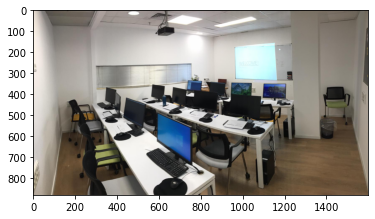

In [135]:
import matplotlib.pyplot as plt

plt.imshow(photo)
plt.show()

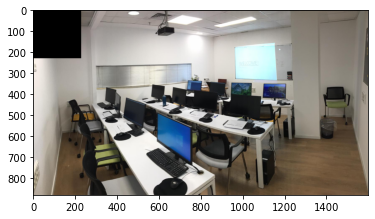

In [136]:
photo[0:230,0:230]=[0,0,0]
plt.imshow(photo)
plt.show()

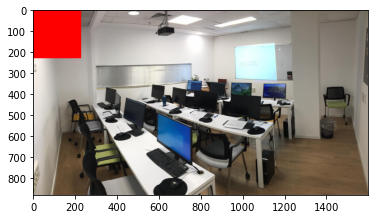

In [137]:
photo[0:230,0:230]=[255,0,0]
plt.imshow(photo)
plt.show()

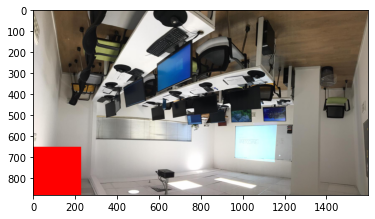

In [138]:
plt.imshow(photo[::-1])